In [1]:
# pip install yfinance

# Source: https://pypi.org/project/yfinance/

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [3]:
#Download all stocks. 'final_code'

sdate= "2021-01-01"
edate = "2022-05-04"

FB = yf.download("FB", start=sdate, end=edate, interval='1h')
AAPL = yf.download("AAPL", start=sdate, end=edate, interval='1h')
AMZN = yf.download("AMZN", start=sdate, end=edate, interval='1h')
NFLX = yf.download("NFLX", start=sdate, end=edate, interval='1h')
GOOG = yf.download("GOOG", start=sdate, end=edate, interval='1h')
VIX = yf.download("^VIX", start=sdate, end=edate, interval='1h')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Subroutine to create date and time. 'final_code'
def clean_df(df):
    df = df.reset_index()
    df['date'] = df['index']
    df['Dates'] = pd.to_datetime(df['date']).dt.date
    df['Time'] = pd.to_datetime(df['date']).dt.time
    df = df.drop(['index'], axis=1)
    return df

In [5]:
# Mapping the function to all dataframes. 'final_code'
FB = clean_df(FB)
AAPL = clean_df(AAPL)
AMZN = clean_df(AMZN)
NFLX = clean_df(NFLX)
GOOG = clean_df(GOOG)
VIX = clean_df(VIX)

In [6]:
# Extract file into csv for model analysis in excel

FB.to_csv ("FB.csv")
AAPL.to_csv ("AAPL.csv")
AMZN.to_csv ("AMZN.csv")
NFLX.to_csv ("NFLX.csv")
GOOG.to_csv ("GOOG.csv")
VIX.to_csv ("VIX.csv")

In [7]:
#Checking the dataframe.
FB

,Open,High,Low,Close,Adj Close,Volume,date,Dates,Time
0,273.750000,273.899994,269.980011,271.170013,271.170013,2708653,2021-01-04 09:30:00-05:00,2021-01-04,09:30:00
1,271.269989,272.637787,267.459991,268.320007,268.320007,2139367,2021-01-04 10:30:00-05:00,2021-01-04,10:30:00
2,268.220001,269.049988,265.200012,266.940002,266.940002,1908151,2021-01-04 11:30:00-05:00,2021-01-04,11:30:00
3,266.920013,269.040009,265.899994,268.446899,268.446899,1320871,2021-01-04 12:30:00-05:00,2021-01-04,12:30:00
4,268.440002,269.779907,268.070007,269.279999,269.279999,1708964,2021-01-04 13:30:00-05:00,2021-01-04,13:30:00
...,...,...,...,...,...,...,...,...,...
2344,211.240005,212.190002,209.869995,210.470001,210.470001,3222474,2022-05-03 11:30:00-04:00,2022-05-03,11:30:00
2345,210.470001,214.661499,210.074997,213.940002,213.940002,6442176,2022-05-03 12:30:00-04:00,2022-05-03,12:30:00
2346,214.050003,214.899902,212.039993,212.330002,212.330002,4732690,2022-05-03 13:30:00-04:00,2022-05-03,13:30:00
2347,212.360001,214.149902,211.679993,212.460098,212.460098,5480682,2022-05-03 14:30:00-04:00,2022-05-03,14:30:00


In [8]:
#Checking the dataframe.
GOOG

,Open,High,Low,Close,Adj Close,Volume,date,Dates,Time
0,1758.420044,1760.640015,1740.949951,1748.239990,1748.239990,241052,2021-01-04 09:30:00-05:00,2021-01-04,09:30:00
1,1749.130005,1757.816040,1725.000000,1730.589966,1730.589966,165475,2021-01-04 10:30:00-05:00,2021-01-04,10:30:00
2,1730.550049,1731.800049,1710.880005,1716.534424,1716.534424,229129,2021-01-04 11:30:00-05:00,2021-01-04,11:30:00
3,1716.150024,1723.199951,1707.849976,1722.277466,1722.277466,234225,2021-01-04 12:30:00-05:00,2021-01-04,12:30:00
4,1722.466187,1729.150024,1720.229980,1724.395020,1724.395020,144923,2021-01-04 13:30:00-05:00,2021-01-04,13:30:00
...,...,...,...,...,...,...,...,...,...
2344,2371.000000,2375.060059,2350.000000,2356.614990,2356.614990,111340,2022-05-03 11:30:00-04:00,2022-05-03,11:30:00
2345,2353.939941,2384.000000,2352.909912,2377.850098,2377.850098,114793,2022-05-03 12:30:00-04:00,2022-05-03,12:30:00
2346,2377.850098,2386.000000,2359.705078,2362.129883,2362.129883,98424,2022-05-03 13:30:00-04:00,2022-05-03,13:30:00
2347,2362.340088,2377.409912,2357.120117,2371.379883,2371.379883,111307,2022-05-03 14:30:00-04:00,2022-05-03,14:30:00


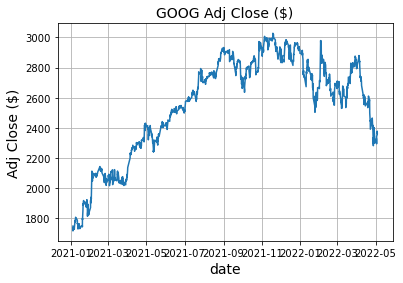

In [9]:
# Graphical representation of the price history for one stock

plt.plot(GOOG['date'], GOOG['Adj Close'])
plt.xlabel("date", fontsize=14)
plt.ylabel("Adj Close ($)", fontsize=14)
plt.title("GOOG Adj Close ($)", fontsize=14) 
plt.grid(True)
plt.show()

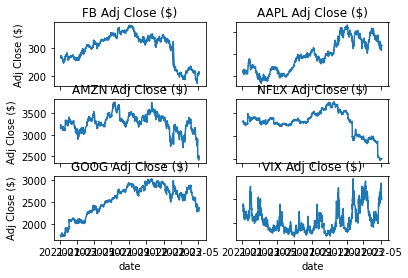

In [10]:
# Graphical representation of the price history

fig, axs = plt.subplots(3, 2)

axs[0, 0].plot(FB['date'], FB['Adj Close'])
axs[0, 0].set_title('FB Adj Close ($)')
axs[0, 1].plot(AAPL['date'], AAPL['Adj Close'])
axs[0, 1].set_title('AAPL Adj Close ($)')
axs[1, 0].plot(AMZN['date'], AMZN['Adj Close'])
axs[1, 0].set_title('AMZN Adj Close ($)')
axs[1, 1].plot(NFLX['date'], NFLX['Adj Close'])
axs[1, 1].set_title('NFLX Adj Close ($)')
axs[2, 0].plot(GOOG['date'], GOOG['Adj Close'])
axs[2, 0].set_title('GOOG Adj Close ($)')
axs[2, 1].plot(VIX['date'], VIX['Adj Close'])
axs[2, 1].set_title('VIX Adj Close ($)')

for ax in axs.flat:
    ax.set(xlabel='date', ylabel='Adj Close ($)')

for ax in fig.get_axes():
    ax.label_outer()

# Source: https://matplotlib.org/3.5.0/gallery/subplots_axes_and_figures/subplots_demo.html

In [11]:
FB_f = yf.Ticker("FB")

# show institutional holders
FB_f.get_institutional_holders()

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",180453366,2022-03-30,0.0787,40125610463
1,Blackrock Inc.,149971299,2022-03-30,0.0654,33347618045
2,"FMR, LLC",122726307,2022-03-30,0.0535,27289421624
3,State Street Corporation,92712376,2022-03-30,0.0404,20615523927
4,Price (T.Rowe) Associates Inc,74661117,2022-03-30,0.0326,16601645976
5,Capital International Investors,54050797,2022-03-30,0.0236,12018735220
6,"Geode Capital Management, LLC",41449631,2022-03-30,0.0181,9216739949
7,Capital World Investors,41239684,2022-03-30,0.0180,9170056134
8,Capital Research Global Investors,29909545,2022-03-30,0.0130,6650686426
9,Norges Bank Investment Management,28527168,2021-12-30,0.0124,9595112956


In [12]:
# show financials

FB_f.quarterly_financials

,2022-03-31,2021-12-31,2021-09-30,2021-06-30
Research Development,7707000000.0,7046000000.0,6316000000.0,6096000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,8908000000.0,12703000000.0,10565000000.0,12513000000.0
Minority Interest,None,None,None,None
Net Income,7465000000.0,10285000000.0,9194000000.0,10394000000.0
Selling General Administrative,5672000000.0,7692000000.0,6500000000.0,5215000000.0
Gross Profit,21903000000.0,27323000000.0,23239000000.0,23678000000.0
Ebit,8524000000.0,12585000000.0,10423000000.0,12367000000.0
Operating Income,8524000000.0,12585000000.0,10423000000.0,12367000000.0
Other Operating Expenses,None,None,None,None


In [13]:
# show balance sheet

FB_f.quarterly_balance_sheet

,2022-03-31,2021-12-31,2021-09-30,2021-06-30
Intangible Assets,9.100000e+08,6.340000e+08,3.650000e+08,5.140000e+08
Capital Surplus,5.751200e+10,5.581100e+10,5.433400e+10,5.284500e+10
Total Liab,4.099000e+10,4.110800e+10,3.622500e+10,3.238200e+10
Total Stockholder Equity,1.232280e+11,1.248790e+11,1.333600e+11,1.382270e+11
Other Current Liab,1.455000e+09,1.269800e+10,1.373000e+09,1.340000e+09
Total Assets,1.642180e+11,1.659870e+11,1.695850e+11,1.706090e+11
Other Current Assets,2.940000e+08,1.490000e+08,1.950000e+08,2.010000e+08
Retained Earnings,6.771200e+10,6.976100e+10,7.923300e+10,8.509700e+10
Other Liab,6.486000e+09,6.721000e+09,6.352000e+09,6.059000e+09
Good Will,1.992300e+10,1.919700e+10,1.906500e+10,1.921900e+10


In [14]:
# show analysts recommendations

FB_f.recommendations.tail(20)

,Firm,To Grade,From Grade,Action
Date,,,,
2022-03-11 10:10:54,Deutsche Bank,Buy,,init
2022-04-05 13:09:08,UBS,Buy,,main
2022-04-13 10:45:39,RBC Capital,Outperform,,main
2022-04-19 12:40:55,Rosenblatt,Neutral,,init
2022-04-19 13:12:10,JMP Securities,Market Outperform,,main
2022-04-20 09:05:05,Citigroup,Buy,Neutral,up
2022-04-21 11:12:48,Credit Suisse,Outperform,,main
2022-04-25 11:42:46,Mizuho,Buy,,main
2022-04-28 10:16:36,Piper Sandler,Neutral,,main


In [15]:
# fetch other financial data for all 5 stocks:  

FB_f = yf.Ticker("FB")
FB_qf = FB_f.quarterly_financials
FB_qb = FB_f.quarterly_balance_sheet
FB_ih = FB_f.get_institutional_holders()
FB_sr = FB_f.recommendations

AAPL_f = yf.Ticker("AAPL")
AAPL_qf = AAPL_f.quarterly_financials
AAPL_qb = AAPL_f.quarterly_balance_sheet
AAPL_ih = AAPL_f.get_institutional_holders()
AAPL_sr = AAPL_f.recommendations

AMZN_f = yf.Ticker("AMZN")
AMZN_qf = AMZN_f.quarterly_financials
AMZN_qb = AMZN_f.quarterly_balance_sheet
AMZN_ih = AMZN_f.get_institutional_holders()
AMZN_sr = AMZN_f.recommendations

NFLX_f = yf.Ticker("NFLX")
NFLX_qf = NFLX_f.quarterly_financials
NFLX_qb = NFLX_f.quarterly_balance_sheet
NFLX_ih = NFLX_f.get_institutional_holders()
NFLX_sr = NFLX_f.recommendations

GOOG_f = yf.Ticker("GOOG")
GOOG_qf = GOOG_f.quarterly_financials
GOOG_qb = GOOG_f.quarterly_balance_sheet
GOOG_ih = GOOG_f.get_institutional_holders()
GOOG_sr = GOOG_f.recommendations